In [69]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

import numpy as np
import pandas as pd

np.random.seed(10)

print (tf.__version__)

2.16.1


In [48]:
data = pd.read_csv('colors_kaggle.csv')
print(data)

       air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
0     air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
1    air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
2         alabama_crimson        Alabama Crimson  #a32638  163   38   56
3              alice_blue             Alice Blue  #f0f8ff  240  248  255
4        alizarin_crimson       Alizarin Crimson  #e32636  227   38   54
..                    ...                    ...      ...  ...  ...  ...
859         yellow_orange          Yellow Orange  #ffae42  255  174   66
860        yellow_process       Yellow (Process)  #ffef00  255  239    0
861            yellow_ryb           Yellow (Ryb)  #fefe33  254  254   51
862                zaffre                 Zaffre  #0014a8    0   20  168
863     zinnwaldite_brown      Zinnwaldite Brown  #2c1608   44   22    8

[864 rows x 6 columns]


In [49]:
print(data.head(5))

     air_force_blue_raf   Air Force Blue (Raf)  #5d8aa8   93  138  168
0   air_force_blue_usaf  Air Force Blue (Usaf)  #00308f    0   48  143
1  air_superiority_blue   Air Superiority Blue  #72a0c1  114  160  193
2       alabama_crimson        Alabama Crimson  #a32638  163   38   56
3            alice_blue             Alice Blue  #f0f8ff  240  248  255
4      alizarin_crimson       Alizarin Crimson  #e32636  227   38   54


In [50]:
len(data)

864

In [51]:
names = data.iloc[:,1]
print(names)

0      Air Force Blue (Usaf)
1       Air Superiority Blue
2            Alabama Crimson
3                 Alice Blue
4           Alizarin Crimson
               ...          
859            Yellow Orange
860         Yellow (Process)
861             Yellow (Ryb)
862                   Zaffre
863        Zinnwaldite Brown
Name: Air Force Blue (Raf), Length: 864, dtype: object


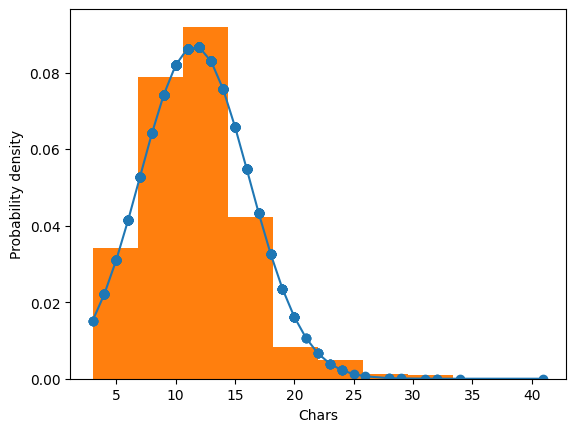

In [52]:
h = sorted(names.str.len().values)

import matplotlib.pyplot as plt
import scipy.stats as stats

fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h, density=True)
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [53]:
np.array(h).max()

41

In [54]:
maxlen = 25
t = Tokenizer(char_level = True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized,maxlen = maxlen)

In [55]:
from keras.utils import to_categorical
one_hot_names = to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

44

In [56]:
print(one_hot_names)
print(one_hot_names.shape)
t.word_index

[[[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 1. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
(864, 25, 

{'e': 1,
 'r': 2,
 'a': 3,
 ' ': 4,
 'l': 5,
 'n': 6,
 'i': 7,
 'o': 8,
 't': 9,
 'u': 10,
 's': 11,
 'd': 12,
 'c': 13,
 'p': 14,
 'g': 15,
 'b': 16,
 'm': 17,
 'h': 18,
 'y': 19,
 'k': 20,
 'w': 21,
 'f': 22,
 'v': 23,
 '(': 24,
 ')': 25,
 'z': 26,
 'q': 27,
 '-': 28,
 'j': 29,
 'x': 30,
 '1': 31,
 '/': 32,
 "'": 33,
 'é': 34,
 '#': 35,
 '’': 36,
 '&': 37,
 'à': 38,
 'ú': 39,
 '9': 40,
 '7': 41,
 '3': 42,
 '.': 43}

In [57]:
padded_names

array([[ 0,  0,  0, ...,  3, 22, 25],
       [ 0,  0,  0, ...,  5, 10,  1],
       [ 0,  0,  0, ..., 11,  8,  6],
       ...,
       [ 0,  0,  0, ..., 19, 16, 25],
       [ 0,  0,  0, ..., 22,  2,  1],
       [ 0,  0,  0, ...,  8, 21,  6]])

In [58]:
# converting rgb values from 0-255 to 0-1
def norm(value):
    return value/255
normalized_values = np.column_stack([norm(data.iloc[:,3]),norm(data.iloc[:,4]),norm(data.iloc[:,5])])
print(normalized_values)

[[0.         0.18823529 0.56078431]
 [0.44705882 0.62745098 0.75686275]
 [0.63921569 0.14901961 0.21960784]
 ...
 [0.99607843 0.99607843 0.2       ]
 [0.         0.07843137 0.65882353]
 [0.17254902 0.08627451 0.03137255]]


In [59]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 25, 256)             │         308,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,243 (1.99 MB)

 Trainable params: 522,243 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
normalized_values.shape

(864, 3)

In [61]:
one_hot_names.shape

(864, 25, 44)

In [62]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40, 
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - acc: 0.6097 - loss: 0.1011 - val_acc: 0.6207 - val_loss: 0.1001
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - acc: 0.6496 - loss: 0.0913 - val_acc: 0.6782 - val_loss: 0.0924
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - acc: 0.7296 - loss: 0.0840 - val_acc: 0.6782 - val_loss: 0.0881
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.7506 - loss: 0.0787 - val_acc: 0.7241 - val_loss: 0.0838
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.7456 - loss: 0.0733 - val_acc: 0.6782 - val_loss: 0.0832
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.7302 - loss: 0.0709 - val_acc: 0.7011 - val_loss: 0.0860
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.7662 - loss: 0.0700 - val_acc: 0.7241 - val_loss: 0.0788
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.7398 - loss: 0.0689 - val_acc: 0.7356 - val_loss: 0.0817
Epoch 9/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.7638

In [ ]:
# train with all data including the 10% that was not included before
model.fit(one_hot_names, normalized_values,
          epochs=10,
          batch_size=32)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - acc: 0.8903 - loss: 0.0211
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - acc: 0.8589 - loss: 0.0178
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - acc: 0.8583 - loss: 0.0151
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - acc: 0.8801 - loss: 0.0130
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - acc: 0.8669 - loss: 0.0123
Epoch 6/10
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - acc: 0.8897 - loss: 0.0108

In [ ]:
model.save_weights('model_1kaggle.weights.h5')

In [ ]:
model.load_weights('model_1kaggle.weights.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# fn. for plot color image
def plot_rgb(rgb):
    data =[[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

# fn. for rescaling again to 0-255
def scale(n):
    return int(n*255)

# final fn. to display the color
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    from keras.utils import to_categorical
    one_hot = to_categorical(padded, num_classes=num_classes)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

In [ ]:
predict("red")
predict("green")
predict("blue")
predict("rose")
predict("sky blue")
predict("ochre yellow")